**Import Python modules**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os

print(cv2.__version__, cv2.__spec__)
#print(cv2.getBuildInformation())

4.1.2 ModuleSpec(name='cv2.cv2', loader=<_frozen_importlib_external.ExtensionFileLoader object at 0x7fceaafc3320>, origin='/usr/local/lib/python3.6/dist-packages/cv2/cv2.cpython-36m-x86_64-linux-gnu.so')


**Mount Google Drive: First mount and authenticate yourself with the following code**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
#Second change your current folder to point working folder My Drive
os.chdir("/content/drive/My Drive/")
#os.listdir()

**Image Filtering in the Spatial Domain**

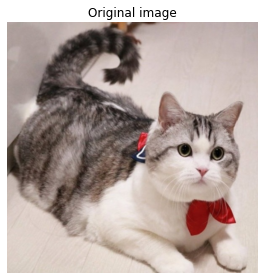

In [4]:
I  = cv2 .imread('./images/cat.png')
I  = cv2 .cvtColor(I, cv2.COLOR_BGR2RGB) 
fig = plt .figure() 
plt.imshow(I), plt.title('Original image'), plt.axis('off') 
plt.tight_layout() 
plt.show()

**Unsharp filtering**

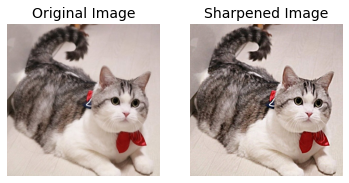

In [5]:
#https://homepages.inf.ed.ac.uk/rbf/HIPR2/unsharp.htm
k=0.6 #Reasonable values for k vary between 0.2 and 0.7
I_blurred=cv2.GaussianBlur(I,(11,11),10)
J=cv2.addWeighted(I, 1.0+k, I_blurred, -k, 0) # J = I + k*(I - I_blurred)
plt.figure('Unsharp filtering')
plt.subplot(121),plt.imshow(I),
plt.axis('off'),plt.title('Original Image',size=14)
plt.subplot(122),plt.imshow(J),
plt.axis('off'),plt.title('Sharpened Image',size=14)
plt.show()

**Unsharp masking produces an edge image**

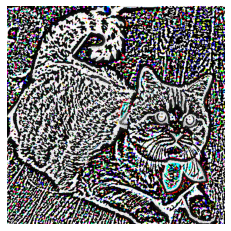

In [6]:
G=I-I_blurred
plt.figure('Unsharp masking')
plt.imshow(G),plt.axis('off')
plt.show()

**Spatial filtering**

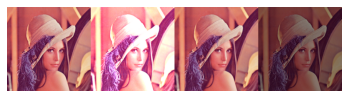

In [7]:
I = cv2.imread('./images/lenacolor512.jpg')
I = cv2.cvtColor(I,cv2.COLOR_BGR2RGB)

# 3x3 kernels
gaussianBlurKernel = np.array(([[1,2,1],[2,4,2],[1,2,1]]), np.float32)/9
sharpenKernel = np.array(([[0,-1,0],[-1,9,-1],[0,-1,0]]), np.float32)/9
meanBlurKernel = np.ones((3,3),np.float32)/9

# https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#filter_depths
# When output depth/ddepth=-1, the output image will have the same depth as the source. 
gaussianBlur = cv2.filter2D(I,-1,gaussianBlurKernel)
meanBlur = cv2.filter2D(I,-1,kernel=meanBlurKernel)
sharpen = cv2.filter2D(I,-1,kernel=sharpenKernel)
horizontalStack = cv2.hconcat([I,gaussianBlur,meanBlur,sharpen])
plt.figure('Spatial filtering')
plt.imshow(horizontalStack),plt.axis('off')
plt.show()

**Image Kernels**

Explained visually [here](https://setosa.io/ev/image-kernels/).

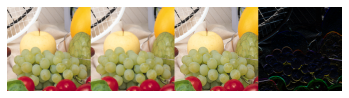

In [8]:
I = cv2.imread('./images/fruits.png')
I=cv2.cvtColor(I,cv2.COLOR_BGR2RGB)

LPKernel=np.ones((3,3),np.float32)/9
HPKernel=np.array(([[0,-1,0],[-1,5,-1],[0,-1,0]]),np.float32)
HEKernel=np.array(([[1,1,1],[0,0,0],[-1,-1,-1]]),np.float32)

LPfilter=cv2.filter2D(I,-1,LPKernel)
HPfilter=cv2.filter2D(I,-1,HPKernel)
HEfilter=cv2.filter2D(I,-1,HEKernel)

Results=cv2.hconcat([I,LPfilter,HPfilter,HEfilter])
plt.figure('Image Kernels')
plt.imshow(Results),plt.axis('off')
plt.show()

**Emboss Filters**

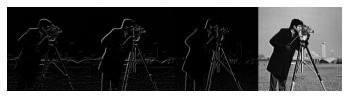

In [9]:
I=cv2.imread('./images/cameraman.png')
#I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB) #no need as it is a grayscale image

K1=np.array(([[0,1,0],[0,0,0],[0,-1,0]]),np.float32)
K2=np.array(([[1,0,0],[0,0,0],[0,0,-1]]),np.float32)
K3=np.array(([[0,0,0],[1,0,-1],[0,0,0]]),np.float32)
K4=np.array(([[0,1,-1],[0,0,0],[1,0,0]]),np.float32)

K1filter=cv2.filter2D(I,-1,K1)
K2filter=cv2.filter2D(I,-1,K2)
K3filter=cv2.filter2D(I,-1,K3)
K4filter=cv2.filter2D(I,-1,K4)

Emboss=cv2.hconcat([K1filter,K2filter,K3filter,K4filter])
plt.figure('Emboss Filters')
plt.imshow(Emboss),plt.axis('off')
plt.show()